# Load Packages

In [1]:
import os
import sys, importlib

In [2]:
from dotenv import load_dotenv
# Load Session Id vom .env file to envoironment variables
load_dotenv()

True

In [3]:
import pandas as pd

In [4]:
try:
    importlib.reload(sys.modules['exploratory_analysis'])
    importlib.reload(sys.modules['exploratory_analysis.visualization'])
    importlib.reload(sys.modules['exploratory_analysis.create_pie_chart_from_multi_idx_df'])
except KeyError:
    pass

import exploratory_analysis as ea

# Load Data

In [5]:
data_folder_path=os.environ.get('DATA_PATH')
loan_data_path=os.path.join(data_folder_path,"loan_data.csv")

In [6]:
# Import data
df = ea.import_to_pds(loan_data_path)
df.head(5)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


Names of the columns need to be changed as they may contain a dot. Correspondingly we replace the dot by '_'.

In [7]:
df=ea.transform_col_nm(df,how="replace",what_char=".",by_char="_")
print(f"Column names after name transformation are: {', '.join(list(df.columns))}")

Column names after name transformation are: credit_policy, purpose, int_rate, installment, log_annual_inc, dti, fico, days_with_cr_line, revol_bal, revol_util, inq_last_6mths, delinq_2yrs, pub_rec, not_fully_paid


Column description:
* credit_policy: if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", ...)
* int_rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11).
* installment: The monthly installments owed by the borrower if the loan is funded.
* log_annual_inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days_with_cr_line: The number of days the borrower has had a credit line.
* revol_bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol_util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq_last_6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq_2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years
* pub_rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).
* not_fully_paid: not fully paid.



# Basic Analysis

In [8]:
basic_analysis_result=ea.basic_analysis_df(df)
df_basic_analysis=basic_analysis_result["df_info"]
num_cols=basic_analysis_result["num_cols"]
num_rows=basic_analysis_result["num_rows"]

In [9]:
df_basic_analysis

,col_nm,type,num_unique,num_null
0,credit_policy,int64,2,0
1,purpose,object,7,0
2,int_rate,float64,249,0
3,installment,float64,4788,0
4,log_annual_inc,float64,1987,0
5,dti,float64,2529,0
6,fico,int64,44,0
7,days_with_cr_line,float64,2687,0
8,revol_bal,int64,7869,0
9,revol_util,float64,1035,0


In [10]:
print(f"Number of data: {num_rows}")
print(f"Number of columns: {num_cols}")

Number of data: 9578
Number of columns: 14


First observations:
* No null entries -> Data is clean. No further processing needed for handling gaps in the data.
* No unique identifier for each data
* Possible categorical data to be one-hot-encoded: purpose

# Further Preprocessing
One-hot-encode categorical data

In [11]:
# Columns to one-hot-encode 
li_one_hot=["purpose"]
one_hot_result=ea.one_hot_encode(df_input=df,li_one_hot=li_one_hot)
df=one_hot_result["df_result"]
dummies_dict=one_hot_result["dummies_dict"]

In [12]:
df.head(5)

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,...,delinq_2yrs,pub_rec,not_fully_paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,...,0,0,0,0,0,1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,...,0,0,0,0,1,0,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,...,0,0,0,0,0,1,0,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,...,0,0,0,0,0,1,0,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,...,1,0,0,0,1,0,0,0,0,0


In [13]:
for key,item_vector in dummies_dict.items():
    print(f"The column {key} has been one-hot-encoded yielding the new columns: {item_vector}")

The column purpose has been one-hot-encoded yielding the new columns: ['purpose_all_other', 'purpose_credit_card', 'purpose_debt_consolidation', 'purpose_educational', 'purpose_home_improvement', 'purpose_major_purchase', 'purpose_small_business']


# Correlation Analysis

## Threshold = 0.1

In [37]:
CorrelationFeatures=ea.CorrelationFeatures(df_input=df,dummies_dict=dummies_dict).filter_correlations(threshold_absolute_correlation=0.1)

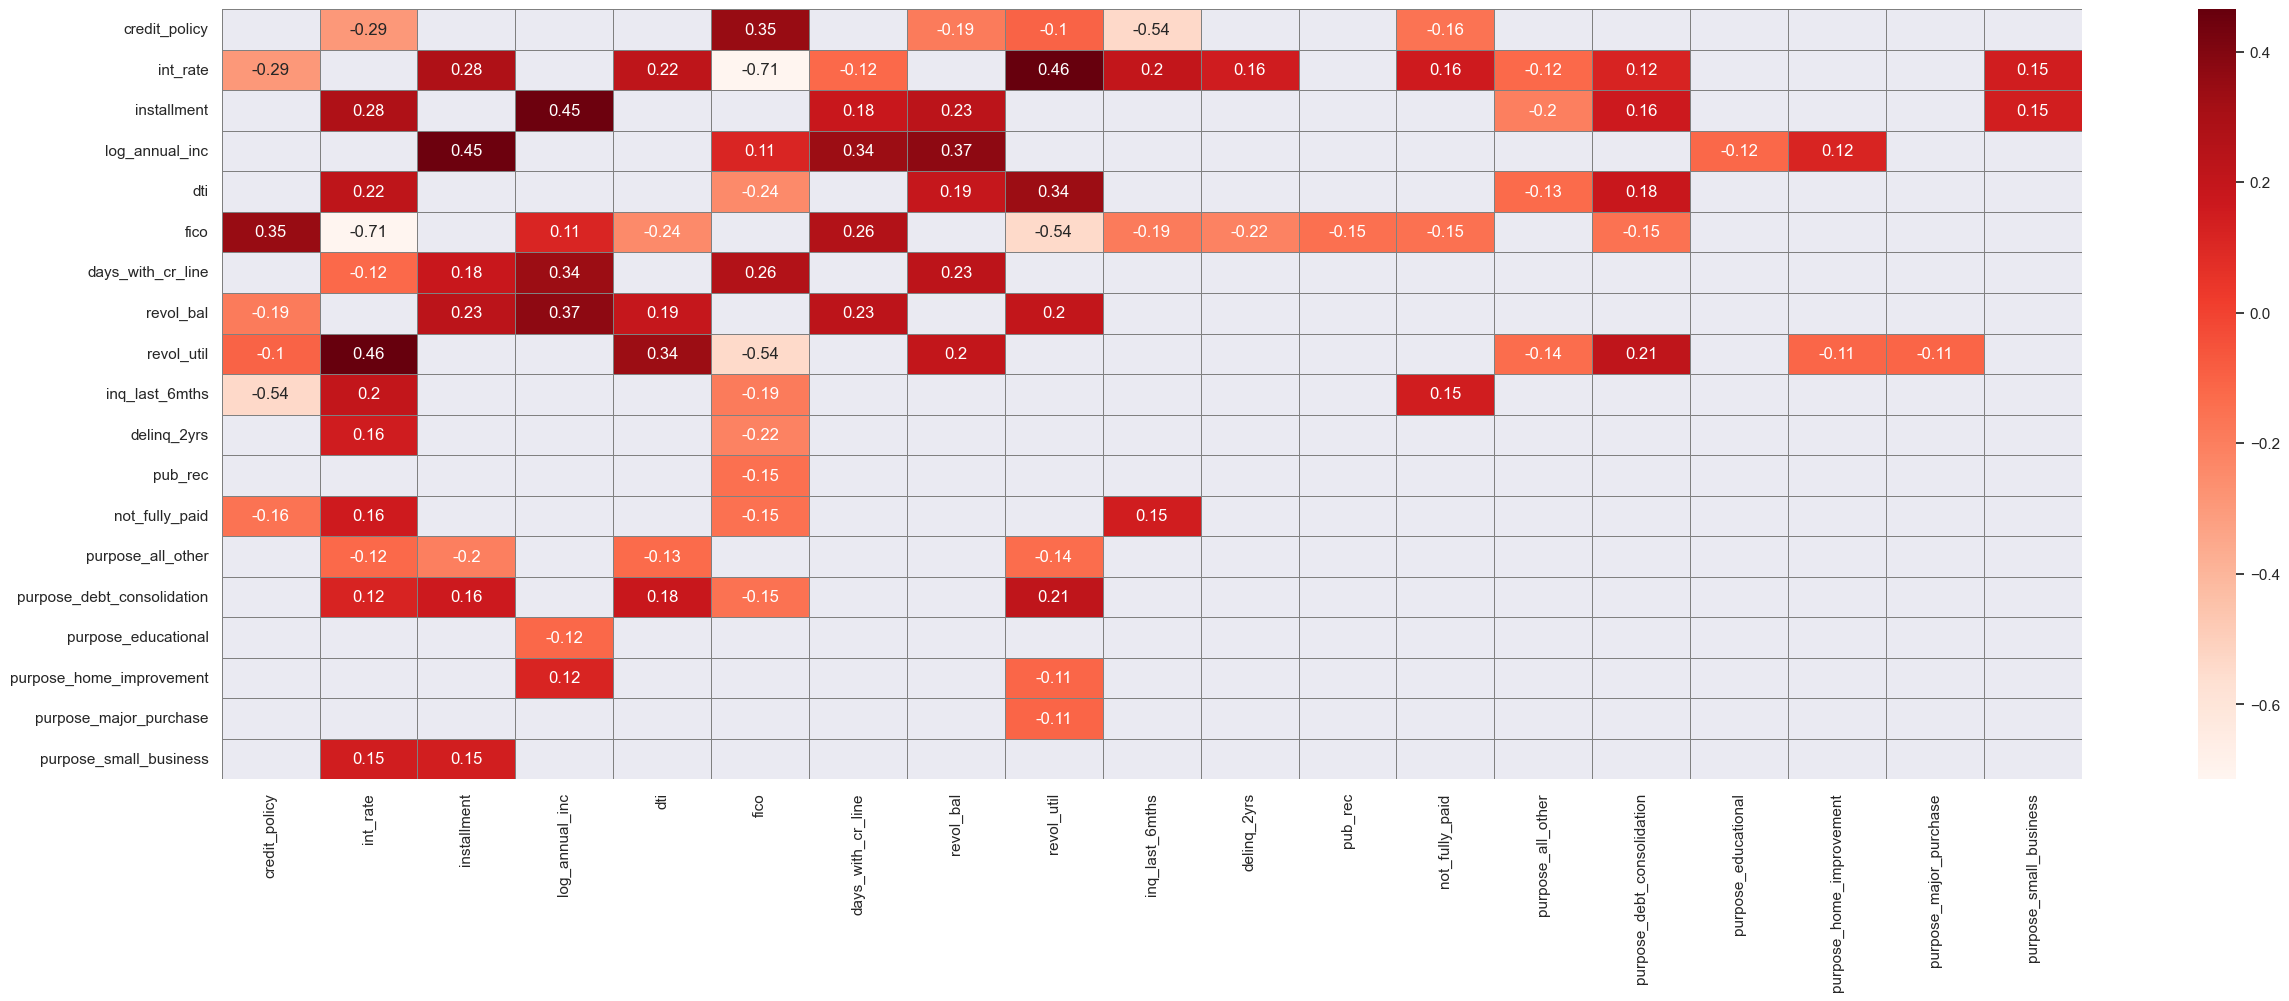

In [38]:
CorrelationFeatures.show_heat_map()

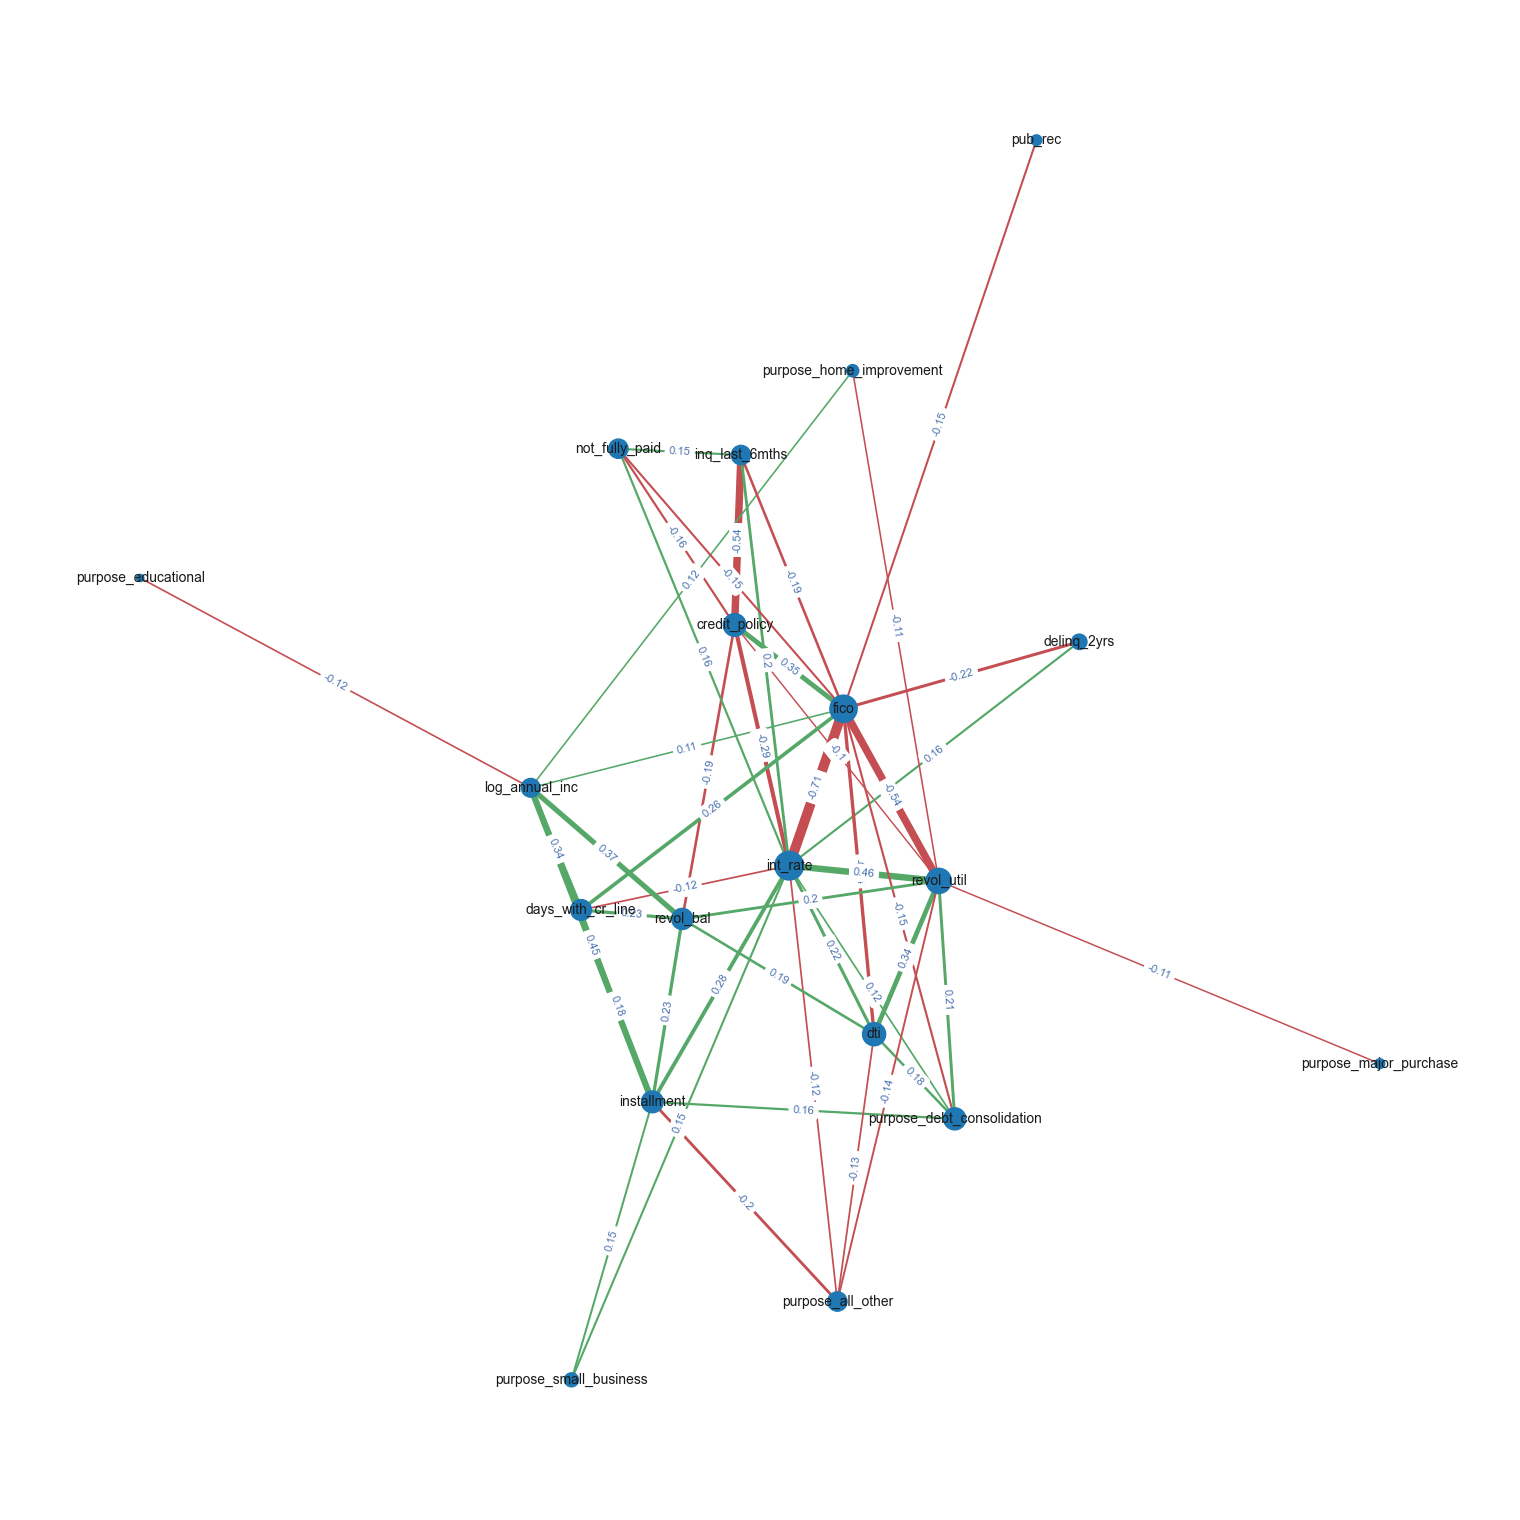

In [39]:
CorrelationFeatures.show_correlation_graph()